## MC with Copilot 

Prompt: "Write a simple Lennard Jones Monte Carlo Simulation in Python". "Show me the code for this simulation."

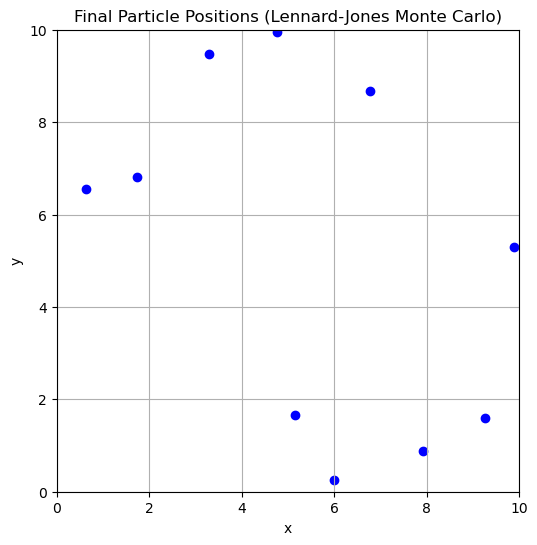

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_particles = 10
box_size = 10.0
temperature = 1.0
epsilon = 1.0
sigma = 1.0
num_steps = 1000
max_displacement = 0.1

# Initialize particle positions randomly
positions = np.random.rand(num_particles, 2) * box_size
def lennard_jones_potential(r2):
    """Compute Lennard-Jones potential for squared distance r2"""
    if r2 < (3 * sigma)**2:
        r6 = r2**3
        r12 = r6**2
        return 4 * epsilon * (sigma**12 / r12 - sigma**6 / r6)
    else:
        return 0.0

def total_energy(positions):
    """Compute total Lennard-Jones energy of the system"""
    energy = 0.0
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            rij = positions[i] - positions[j]
            rij -= box_size * np.round(rij / box_size)  # Periodic boundary conditions
            r2 = np.dot(rij, rij)
            energy += lennard_jones_potential(r2)
    return energy

# Monte Carlo simulation using Metropolis criterion
for step in range(num_steps):
    i = np.random.randint(num_particles)
    old_pos = positions[i].copy()
    old_energy = total_energy(positions)

    # Propose new position
    displacement = (np.random.rand(2) - 0.5) * max_displacement * 2
    positions[i] += displacement
    positions[i] %= box_size  # Apply periodic boundary conditions

    new_energy = total_energy(positions)
    delta_energy = new_energy - old_energy

    # Metropolis criterion
    if delta_energy > 0 and np.random.rand() > np.exp(-delta_energy / temperature):
        positions[i] = old_pos  # Reject move

# Visualization of final particle positions
plt.figure(figsize=(6, 6))
plt.scatter(positions[:, 0], positions[:, 1], c='blue')
plt.xlim(0, box_size)
plt.ylim(0, box_size)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final Particle Positions (Lennard-Jones Monte Carlo)')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Metropolis Move 

<a title="Christophe Rowley, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Schematic_of_the_Metropolis_Monte_Carlo_Algorithm.png"><img width="512" alt="Schematic of the Metropolis Monte Carlo Algorithm" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/Schematic_of_the_Metropolis_Monte_Carlo_Algorithm.png/512px-Schematic_of_the_Metropolis_Monte_Carlo_Algorithm.png?20161001234408"></a>

In [ ]:
# Copilot Code 
delta_energy = new_energy - old_energy
# Metropolis criterion
if delta_energy > 0 and np.random.rand() > np.exp(-delta_energy / temperature):
    positions[i] = old_pos  # Reject move

If `delta_energy >0` then `old_energy< new_energy`, draw random number and compare to $\exp(-\Delta V/kT)$. 

## Let's record the total energy 

And also initialize the particles on a grid - see MD. 

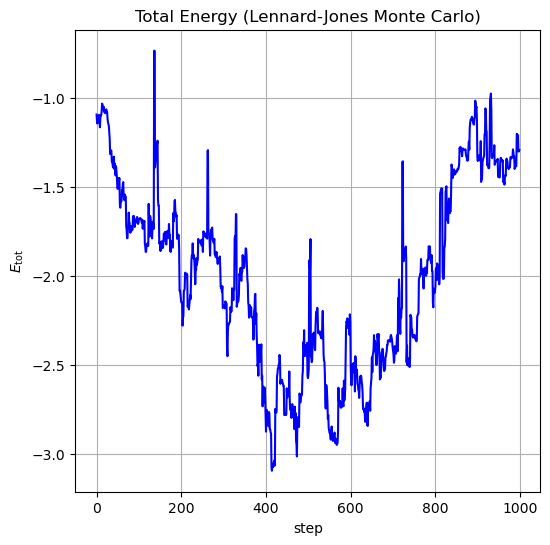

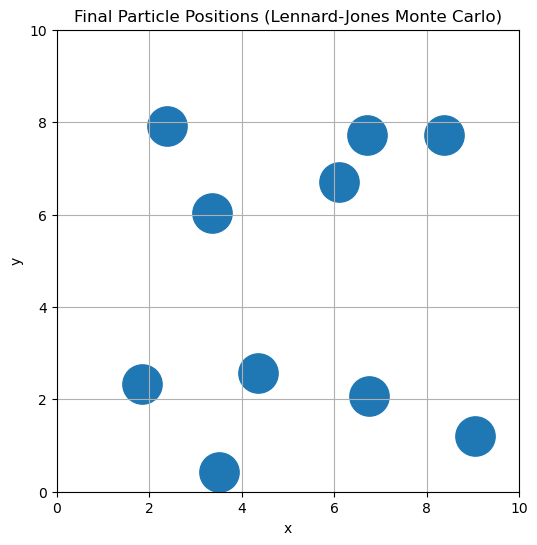

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_particles = 10
box_size = 10.0
temperature = 1.0
epsilon = 1.0
sigma = 1.0
num_steps = 1000
max_displacement = 0.1

# Initialize particle positions on a grid 

X, Y = np.mgrid[2:(box_size-1):5j, 2:(box_size-1):5]
positions = np.vstack([X.ravel(), Y.ravel()]).T


def lennard_jones_potential(r2):
    """Compute Lennard-Jones potential for squared distance r2"""
    if r2 < (3 * sigma)**2:
        r6 = r2**3
        r12 = r6**2
        return 4 * epsilon * (sigma**12 / r12 - sigma**6 / r6)
    else:
        return 0.0

def total_energy(positions):
    """Compute total Lennard-Jones energy of the system"""
    energy = 0.0
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            rij = positions[i] - positions[j]
            rij -= box_size * np.round(rij / box_size)  # Periodic boundary conditions
            r2 = np.dot(rij, rij)
            energy += lennard_jones_potential(r2)
    return energy

total_E = []
# Monte Carlo simulation using Metropolis criterion
for step in range(num_steps):
    i = np.random.randint(num_particles)
    old_pos = positions[i].copy()
    old_energy = total_energy(positions)

    # Propose new position
    displacement = (np.random.rand(2) - 0.5) * max_displacement * 2
    positions[i] += displacement
    positions[i] %= box_size  # Apply periodic boundary conditions

    new_energy = total_energy(positions)
    delta_energy = new_energy - old_energy

    # Metropolis criterion
    if delta_energy > 0 and np.random.rand() > np.exp(-delta_energy / temperature):
        positions[i] = old_pos  # Reject move
    
    total_E.append(total_energy(positions))

# Visualization of final particle positions
plt.figure(figsize=(6, 6))
plt.plot(total_E[1:], c='blue')
plt.xlabel('step')
plt.ylabel('$E_\mathrm{tot}$')
plt.title('Total Energy (Lennard-Jones Monte Carlo)')
plt.grid(True)
plt.show()

# Visualization of final particle positions
plt.figure(figsize=(6, 6))
plt.scatter(positions[:, 0], positions[:, 1],s=800)
plt.xlim(0, box_size)
plt.ylim(0, box_size)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final Particle Positions (Lennard-Jones Monte Carlo)')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
